In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

Using TensorFlow backend.


In [0]:
Apple___Apple_scab_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Apple___Apple_scab'
Apple___Black_rot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Apple___Black_rot'
Grape___Black_rot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Grape___Black_rot'
Grape___Esca_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Grape___Esca_(Black_Measles)'
Grape___Leaf_blight_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
Potato___Early_blight_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Potato___Early_blight'
Potato___Late_blight_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Potato___Late_blight'
Tomato___Bacterial_spot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Tomato___Bacterial_spot'
Tomato___Septoria_leaf_spot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Tomato___Septoria_leaf_spot'
Tomato___Target_Spot_DIR='/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Tomato___Target_Spot'

X=[]
Z=[]

NUM_CLASSES = 10
CHANNELS = 3
IMG_SIZE = 224

RESNET50_POOLING = 'avg'
RESNET50_WEIGHTS = 'imagenet'
DENSE_LAYER_ACTIVATION = 'relu'
OUTPUT_DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'
LOSS_METRICS = ['accuracy']

LEARNING_RATE = 0.001
BETA1 = 0.9
BETA2 = 0.999

NUM_EPOCHS = 50
BATCH_SIZE = 100

In [0]:
def assign_label(img,plantdisease_type):
    return plantdisease_type
    
def make_train_data(plantdisease_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,plantdisease_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [0]:
make_train_data('Apple Scab',Apple___Apple_scab_DIR)
print(len(X))
make_train_data('Apple Black rot',Apple___Black_rot_DIR)
print(len(X))
make_train_data('Grape Black Rot',Grape___Black_rot_DIR)
print(len(X))
make_train_data('Grape Esca',Grape___Esca_DIR)
print(len(X))
make_train_data('Grape Leaf blight',Grape___Leaf_blight_DIR)
print(len(X))
make_train_data('Potato Early blight',Potato___Early_blight_DIR)
print(len(X))
make_train_data('Potato Late blight',Potato___Late_blight_DIR)
print(len(X))
make_train_data('Tomato Bacterial spot',Tomato___Bacterial_spot_DIR)
print(len(X))
make_train_data('Tomato Septoria leaf spot',Tomato___Septoria_leaf_spot_DIR)
print(len(X))
make_train_data('Tomato Target spot',Tomato___Target_Spot_DIR)
print(len(X))

100%|██████████| 500/500 [02:45<00:00,  3.02it/s]


500


100%|██████████| 500/500 [02:47<00:00,  2.99it/s]


1000


100%|██████████| 500/500 [02:41<00:00,  3.09it/s]


1500


100%|██████████| 500/500 [02:39<00:00,  3.14it/s]


2000


100%|██████████| 500/500 [03:02<00:00,  2.74it/s]


2500


100%|██████████| 500/500 [03:13<00:00,  2.58it/s]


3000


100%|██████████| 500/500 [02:59<00:00,  2.78it/s]


3500


100%|██████████| 500/500 [02:49<00:00,  2.96it/s]


4000


100%|██████████| 500/500 [02:49<00:00,  2.94it/s]


4500


100%|██████████| 500/500 [02:52<00:00,  2.91it/s]

5000


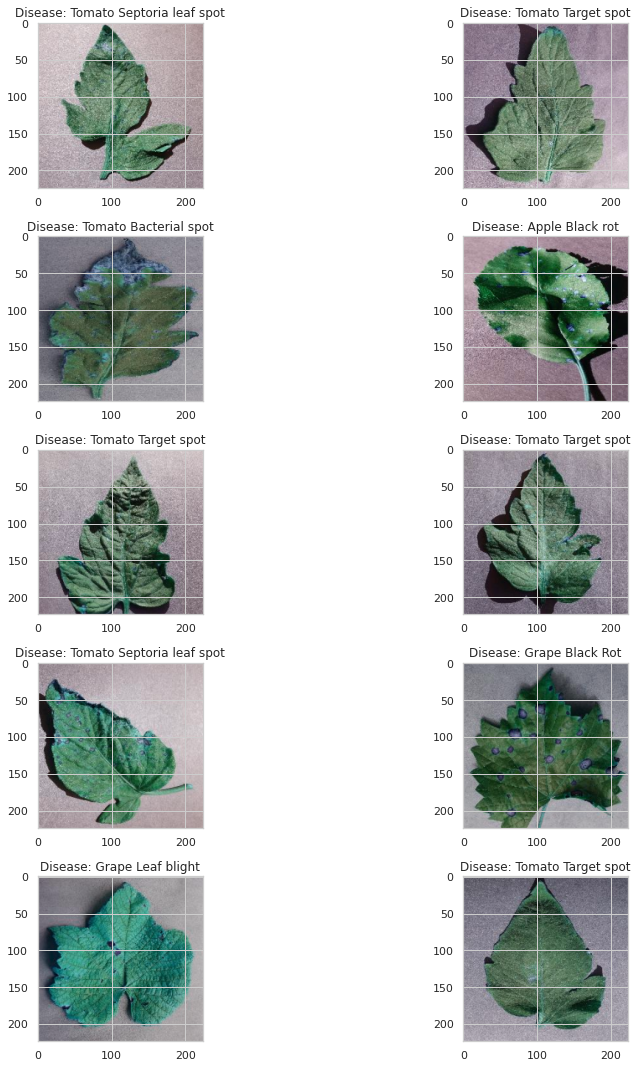

In [0]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Disease: '+Z[l])
        
plt.tight_layout()

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,10)
X=np.array(X)
X=X/255

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [0]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [0]:
model = Sequential()
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING, weights = RESNET50_WEIGHTS, input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS)))
model.add(BatchNormalization())
model.add(Dense(256, activation= DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(128, activation= DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(64, activation= DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(NUM_CLASSES, activation = OUTPUT_DENSE_LAYER_ACTIVATION))
model.layers[0].trainable = False

94773248/94765736 [==============================] - 1s 0us/step


In [0]:
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,factor=0.1)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [0]:
Adam = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(optimizer=Adam, loss=OBJECTIVE_FUNCTION, metrics=LOSS_METRICS)

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

In [0]:
#History = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
#                    epochs=NUM_EPOCHS,
#                    validation_data = (x_test, y_test),
#                    steps_per_epoch=x_train.shape[0] // BATCH_SIZE,
#                    validation_steps=x.test.shape[0] // BATCH_SIZE,
#                    verbose=1)
History = model.fit(x_train, y_train, epochs=NUM_EPOCHS, batch_size= BATCH_SIZE, validation_data = (x_test,y_test))

Epoch 1/50
38/38 [==============================] - 248s 7s/step - loss: 1.4372 - accuracy: 0.5192 - val_loss: 2.5816 - val_accuracy: 0.0944
Epoch 2/50
38/38 [==============================] - 247s 6s/step - loss: 0.7559 - accuracy: 0.7507 - val_loss: 2.5563 - val_accuracy: 0.0944
Epoch 3/50
38/38 [==============================] - 251s 7s/step - loss: 0.5439 - accuracy: 0.8203 - val_loss: 2.4699 - val_accuracy: 0.1608
Epoch 4/50
38/38 [==============================] - 253s 7s/step - loss: 0.4156 - accuracy: 0.8709 - val_loss: 2.3495 - val_accuracy: 0.2136
Epoch 5/50
38/38 [==============================] - 254s 7s/step - loss: 0.3648 - accuracy: 0.8861 - val_loss: 2.2033 - val_accuracy: 0.2088
Epoch 6/50
38/38 [==============================] - 252s 7s/step - loss: 0.2807 - accuracy: 0.9152 - val_loss: 2.0451 - val_accuracy: 0.2752
Epoch 7/50
38/38 [==============================] - 252s 7s/step - loss: 0.2297 - accuracy: 0.9320 - val_loss: 2.0440 - val_accuracy: 0.2856
Epoch 8/50
38

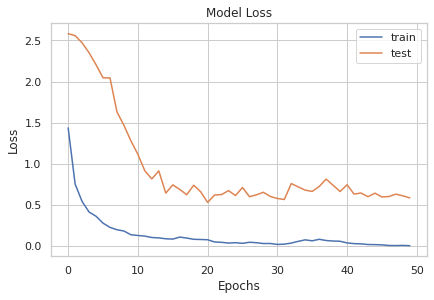

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

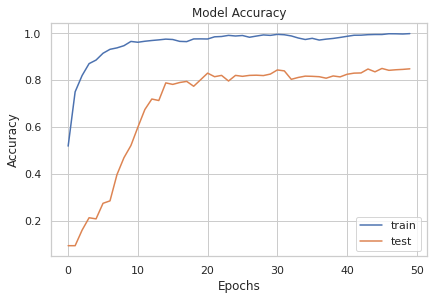

In [0]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

40/40 - 66s - loss: 0.5859 - accuracy: 0.8488

Test accuracy: 0.848800003528595


In [0]:
x_train.shape

(3750, 224, 224, 3)

In [0]:
x_test.shape

(1250, 224, 224, 3)